In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="whitegrid", palette="Set2")  
BASE_PALETTE = sns.color_palette()

plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial"],
    "grid.alpha": 0.4,
    "grid.linestyle": "--"
})

Loading the dataset

In [154]:
df = pd.read_csv('Final_data.csv')
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level    BMI  Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  cholesterol_mg  serving_size_g cooking_method  prep_time_min  cook_time_min  rating   Name of Exercise  Sets   Reps                                          Benefit  Burns Calories (per 30 min)    Target Muscle Group        Equipment Needed Difficulty Level  Body Part Type of Muscle                 Workout   BMI_calc  cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  cal_balance  lean_mass_kg  expected_burn  Burns Calories (per 30 min)_bc Burns_Calories_Bin
0  34.91    Male        65.27        1.62   188.58   157.65        69.05                      1.00          1080.90     Strength       26.800377                   1.50                           3.99              2.01  24.87                   2.99               0.01  267.68    106.05  71.63    1806.0     Other      Lunch       Vegan    31.77    1729.94          285.05          120.47        Grilled          16.24         110.79    1.31   Decline Push-ups  4.99  20.91             Improves shoulder health and posture                       342.58     Shoulders, Triceps           Cable Machine         Advanced       Legs           Lats          Dumbbell flyes  24.870447          2139.59   0.500432        1.624789  0.741237   0.835985       725.10     47.777394       685.1600                    7.260425e+19             Medium
1  23.37  Female        56.41        1.55   179.43   131.75        73.18                      1.37          1809.91         HIIT       27.655021                   1.90                           4.00              2.01  23.48                   3.01               0.97  214.32     85.41  56.97    1577.0     Other      Lunch  Vegetarian    12.34     693.08          300.61          109.15          Fried          16.47          12.01    1.92        Bear Crawls  4.01  16.15                            Strengthens lower abs                       357.16  Back, Core, Shoulders             Step or Box     Intermediate      Chest           Lats          Lateral raises  23.479709          1711.65   0.500850        1.514093  0.551247   0.734270      -232.91     40.809803       978.6184                    1.020506e+20               High
2  33.20  Female        58.98        1.67   175.04   123.95        54.96                      0.91           802.26       Cardio       24.320821                   1.88                           2.99              1.02  21.15                   1.99              -0.02  246.04     98.11  65.48    1608.0     Other  Breakfast       Paleo    42.81    2142.48          215.42          399.43         Boiled          54.35           6.09    4.70               Dips  5.00  21.90                            Builds chest strength                       359.63     Quadriceps, Glutes             Step or Box     Intermediate       Arms  Grip Strength    Standing calf raises  21.148123          1965.92   0.500610        1.663445  0.574534   0.708124       805.74     44.635580       654.5266                    1.079607e+20               High
3  38.69  Female        93.78        1.70   191.21   155.10        50.07                      1.10          1450.79         HIIT       32.813572                   2.50                           3.99              1.99  32.45                   3.00               0.04  203.22     80.84  54.56    2657.0     Other      Lunch       Paleo     9.34     123.20            9.70          314.31          Fried          27.73         103.72    4.85  Mountain Climbers  4.01  16.92  Improves coordination and cardiovascular health                       351.65       Biceps, Forearms  Parallel Bars or Chair         Advanced  Shoulders          Upper  Incline dumbbell flyes  32.449827    

In [155]:
df.shape

(20000, 54)

In [156]:
df.describe().T

count          mean           std           min           25%           50%           75%           max
Age                             20000.0  3.885145e+01  1.211458e+01  1.800000e+01  2.817000e+01  3.986500e+01  4.963000e+01  5.967000e+01
Weight (kg)                     20000.0  7.389883e+01  2.117301e+01  3.918000e+01  5.816000e+01  7.000000e+01  8.610000e+01  1.307700e+02
Height (m)                      20000.0  1.723093e+00  1.270328e-01  1.490000e+00  1.620000e+00  1.710000e+00  1.800000e+00  2.010000e+00
Max_BPM                         20000.0  1.798897e+02  1.151081e+01  1.593100e+02  1.700575e+02  1.801400e+02  1.894250e+02  1.996400e+02
Avg_BPM                         20000.0  1.437043e+02  1.426769e+01  1.190700e+02  1.312200e+02  1.429900e+02  1.560600e+02  1.698400e+02
Resting_BPM                     20000.0  6.219581e+01  7.289351e+00  4.949000e+01  5.596000e+01  6.220000e+01  6.809000e+01  7.450000e+01
Session_Duration (hours)        20000.0  1.259446e+00  3.413362e-01  4.900000e-01  1.050000e+00  1.270000e+00  1.460000e+00  2.020000e+00
Calories_Burned                 20000.0  1.280110e+03  5.022290e+02  3.231100e+02  9.108000e+02  1.231450e+03  1.553112e+03  2.890820e+03
Fat_Percentage                  20000.0  2.610131e+01  4.996160e+00  1.133313e+01  2.238781e+01  2.582250e+01  2.967603e+01  3.500000e+01
Water_Intake (liters)           20000.0  2.627485e+00  6.047240e-01  1.460000e+00  2.170000e+00  2.610000e+00  3.120000e+00  3.730000e+00
Workout_Frequency (days/week)   20000.0  3.318629e+00  9.111979e-01  1.940000e+00  2.980000e+00  3.010000e+00  4.000000e+00  5.060000e+00
Experience_Level                20000.0  1.809176e+00  7.362036e-01  1.000000e+00  1.010000e+00  1.990000e+00  2.020000e+00  3.050000e+00
BMI                             20000.0  2.492168e+01  6.701126e+00  1.204000e+01  2.009750e+01  2.412000e+01  2.856000e+01  5.023000e+01
Daily meals frequency           20000.0  2.864804e+00  6.366486e-01  1.950000e+00  2.020000e+00  3.000000e+00  3.010000e+00  4.040000e+00
Physical exercise               20000.0  4.525030e-01  9.866276e-01 -7.000000e-02 -1.000000e-02  1.000000e-02  4.000000e-02  4.050000e+00
Carbs                           20000.0  2.497786e+02  5.510862e+01  1.377200e+02  2.075475e+02  2.429000e+02  2.839750e+02  4.624900e+02
Proteins                        20000.0  9.991829e+01  2.204367e+01  5.517000e+01  8.304000e+01  9.714500e+01  1.136400e+02  1.853400e+02
Fats                            20000.0  6.661217e+01  1.469928e+01  3.659000e+01  5.534000e+01  6.477000e+01  7.575250e+01  1.234200e+02
Calories                        20000.0  2.024418e+03  5.418915e+02  7.810000e+02  1.634000e+03  1.919000e+03  2.360000e+03  3.641000e+03
sugar_g                         20000.0  2.453104e+01  1.444610e+01 -6.700000e-01  1.199000e+01  2.406000e+01  3.749000e+01  5.051000e+01
sodium_mg                       20000.0  1.258140e+03  7.166190e+02  1.922000e+01  6.451275e+02  1.267650e+03  1.850893e+03  2.527270e+03
cholesterol_mg                  20000.0  1.484656e+02  8.738282e+01 -3.890000e+00  7.197000e+01  1.497950e+02  2.218400e+02  3.039900e+02
serving_size_g                  20000.0  3.027195e+02  1.157119e+02  9.595000e+01  2.072175e+02  3.000150e+02  4.018600e+02  5.075200e+02
prep_time_min                   20000.0  3.351745e+01  1.652687e+01  3.950000e+00  1.858750e+01  3.433000e+01  4.794000e+01  6.129000e+01
cook_time_min                   20000.0  6.150216e+01  3.357975e+01  3.350000e+00  3.247750e+01  6.092000e+01  8.937500e+01  1.214600e+02
rating                          20000.0  2.989303e+00  1.157692e+00  9.300000e-01  1.940000e+00  3.000000e+00  4.000000e+00  5.060000e+00
Sets                            20000.0  4.425059e+00  5.795959e-01  2.960000e+00  4.000000e+00  4.020000e+00  5.000000e+00  5.050000e+00
Reps                            20000.0  1.942732e+01  3.679707e+00  4.850000e+00  1.612000e+01  1.990000e+01  2.288000e+01  3.012000e+01
Burns Calories (per 30 min)     

Missing values

In [157]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Missing_Values']

display(null_counts)

Column  Missing_Values
0                              Age               0
1                           Gender               0
2                      Weight (kg)               0
3                       Height (m)               0
4                          Max_BPM               0
5                          Avg_BPM               0
6                      Resting_BPM               0
7         Session_Duration (hours)               0
8                  Calories_Burned               0
9                     Workout_Type               0
10                  Fat_Percentage               0
11           Water_Intake (liters)               0
12   Workout_Frequency (days/week)               0
13                Experience_Level               0
14                             BMI               0
15           Daily meals frequency               0
16               Physical exercise               0
17                           Carbs               0
18                        Proteins               0
19                            Fats               0
20                        Calories               0
21                       meal_name               0
22                       meal_type               0
23                       diet_type               0
24                         sugar_g               0
25                       sodium_mg               0
26                  cholesterol_mg               0
27                  serving_size_g               0
28                  cooking_method               0
29                   prep_time_min               0
30                   cook_time_min               0
31                          rating               0
32                Name of Exercise               0
33                            Sets               0
34                            Reps               0
35                         Benefit               0
36     Burns Calories (per 30 min)               0
37             Target Muscle Group               0
38                Equipment Needed               0
39                Difficulty Level               0
40                       Body Part               0
41                  Type of Muscle               0
42                         Workout               0
43                        BMI_calc               0
44                 cal_from_macros               0
45                       pct_carbs               0
46                  protein_per_kg               0
47                         pct_HRR               0
48                       pct_maxHR               0
49                     cal_balance               0
50                    lean_mass_kg               0
51                   expected_burn               0
52  Burns Calories (per 30 min)_bc               0
53              Burns_Calories_Bin               0

In [158]:
print("Number of duplicates:\n", df.duplicated().sum())

Number of duplicates:
 0


In [159]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI', 
            'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 
            'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 
            'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 
            'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']

cat_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'meal_name', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 
            'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout',
            'Burns_Calories_Bin']

In [160]:
summary_data = []

for col in cat_cols:
    # Drop NaNs but keep original strings intact
    vals = df[col].dropna()

    # Unique values sorted alphabetically
    unique_vals = sorted(pd.Index(vals).drop_duplicates().tolist(), key=lambda x: str(x).lower())

    # Most frequent value
    most_frequent = vals.mode().iloc[0] if not vals.mode().empty else None

    # Add to summary table
    summary_data.append({
        'Column': col,
        'Unique Count': len(unique_vals),
        'Most Frequent Value': most_frequent,
        'Unique Values': "\n".join(map(str, unique_vals))
    })

# Create summary table
summary_table = pd.DataFrame(summary_data)

# Display nicely
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 0)

display(summary_table.style.set_properties(**{'white-space': 'pre-wrap'}))


Drop "meal_name" as it has only one value "Other"

In [161]:
df = df.drop(columns=["meal_name"])

In [162]:
# The columns below are very close to integers (e.g., 1.01, 2.99), so we round them to clean up the data.
# Additionally, attributes like workout frequency, sets, and reps cannot logically be decimals.
cols_to_round = [
    'Age',
    'Workout_Frequency (days/week)',
    'Daily meals frequency',
    'Experience_Level',
    'Sets',
    'Reps'
]
df[cols_to_round] = df[cols_to_round].round().astype(int)


# These columns represent physical or nutritional quantities, which cannot be negative.
cols_with_neg_val = ["Physical exercise", "sugar_g", "cholesterol_mg"]
df = df[(df[cols_with_neg_val] >= 0).all(axis=1)]

display(df[cols_to_round].head(20))

Age  Workout_Frequency (days/week)  Daily meals frequency  Experience_Level  Sets  Reps
0    35                              4                      3                 2     5    21
1    23                              4                      3                 2     4    16
3    39                              4                      3                 2     4    17
4    45                              4                      3                 2     5    15
7    56                              4                      3                 2     5    19
8    24                              4                      3                 3     4    24
9    39                              2                      3                 1     4    16
10   51                              4                      3                 3     5    17
11   48                              5                      3                 3     4    21
12   19                              5                      3                 3     4    24
13   38                              5                      4                 3     5    15
14   27                              3                      3                 1     4    15
15   19                              4                      2                 2     5    18
16   40                              5                      2                 3     5    21
18   19                              3                      3                 1     4    25
19   46                              4                      2                 2     4    23
20   37                              3                      3                 2     5    23
22   31                              4                      2                 2     4    24
24   51                              4                      2                 2     4    15
25   54                              3                      3                 2     5    17

Distributions of categorical columns

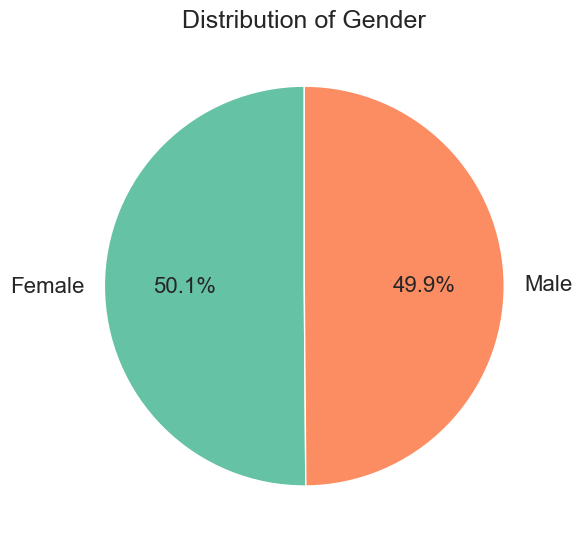

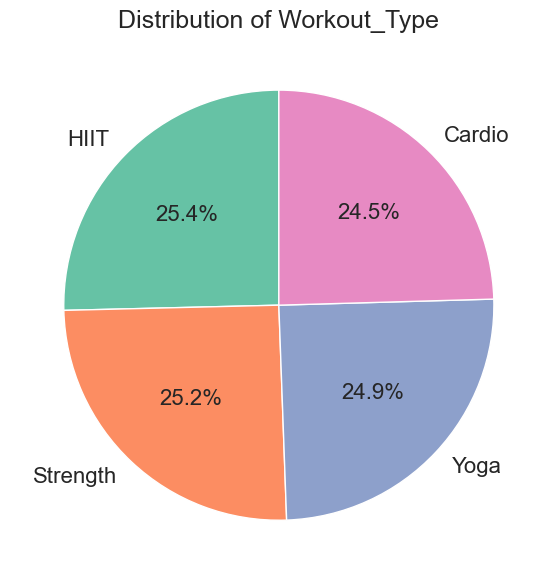

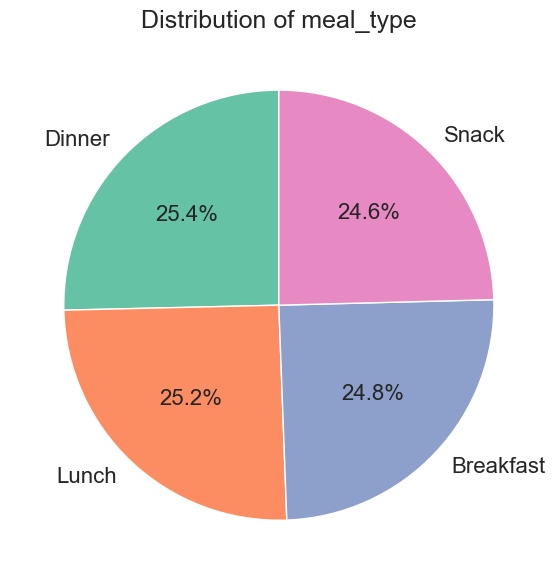

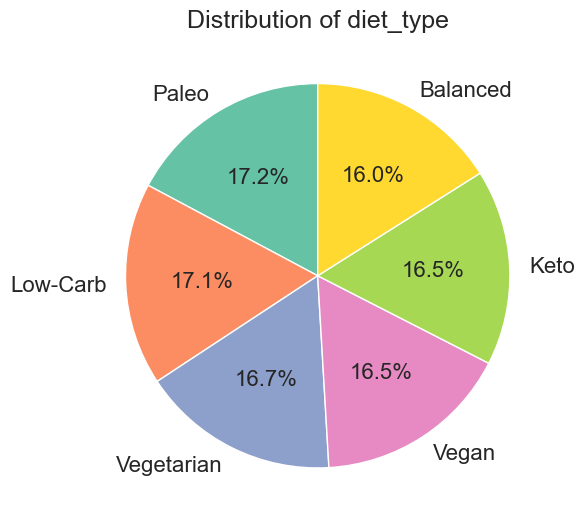

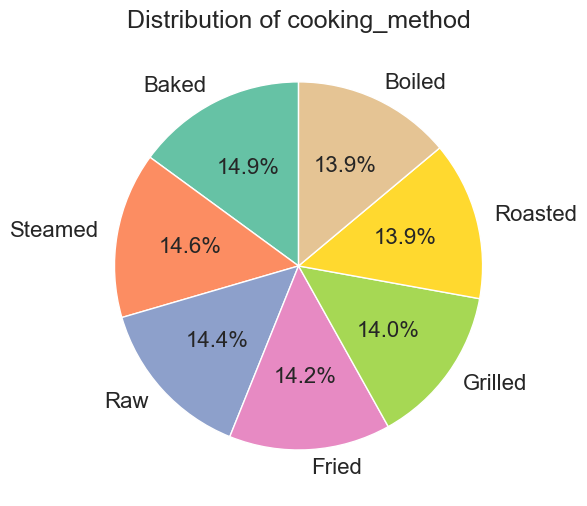

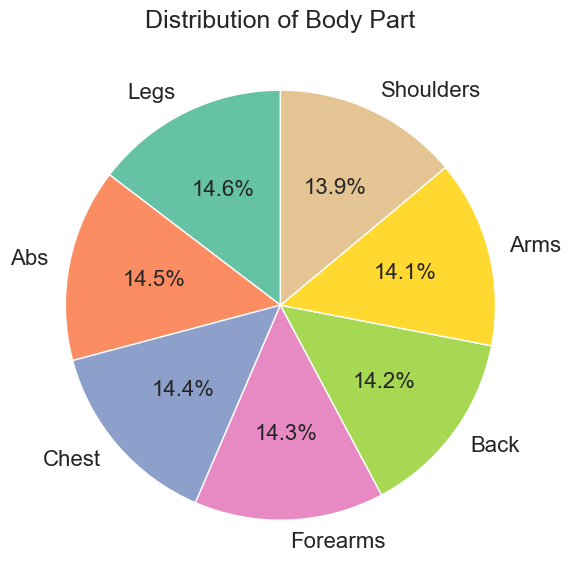

In [163]:
pie_cols = ["Gender", "Workout_Type", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in pie_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts(dropna=False)
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.tight_layout()
    plt.show()


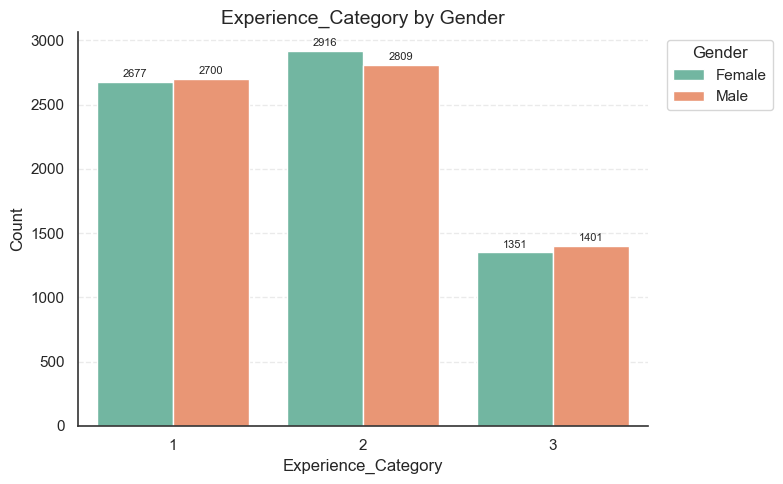

In [164]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df,
    x="Experience_Level",                    
    hue="Gender",
    order=sorted(df["Experience_Level"].unique())
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.title("Experience_Category by Gender")
plt.xlabel("Experience_Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
sns.despine()
plt.tight_layout()
plt.show()


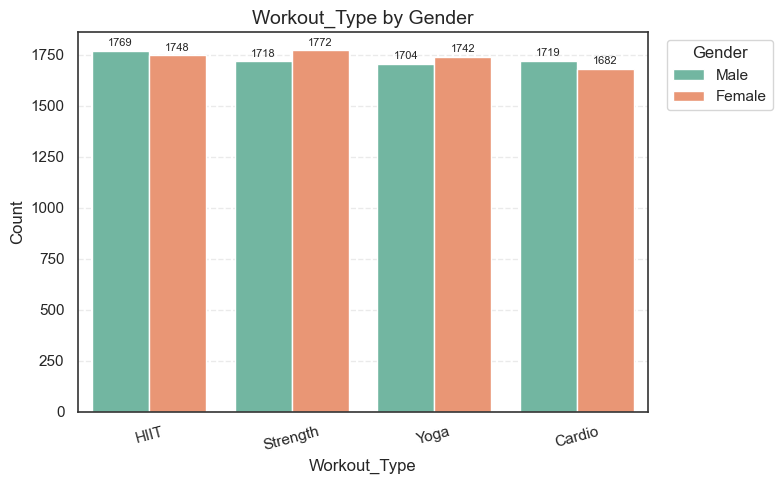

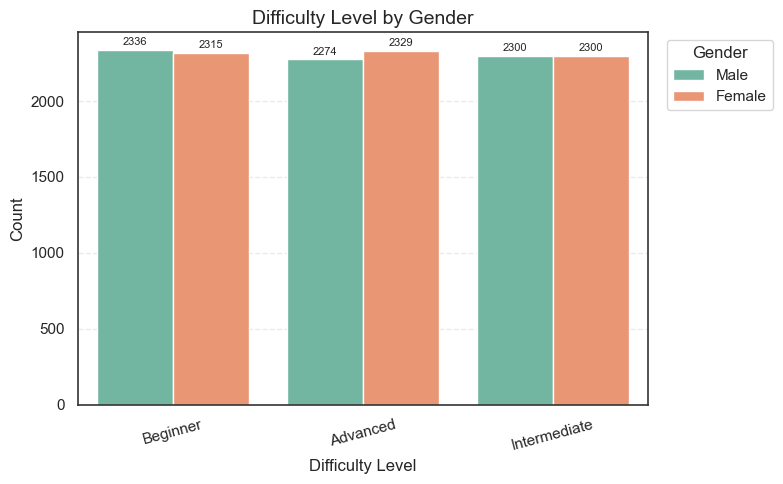

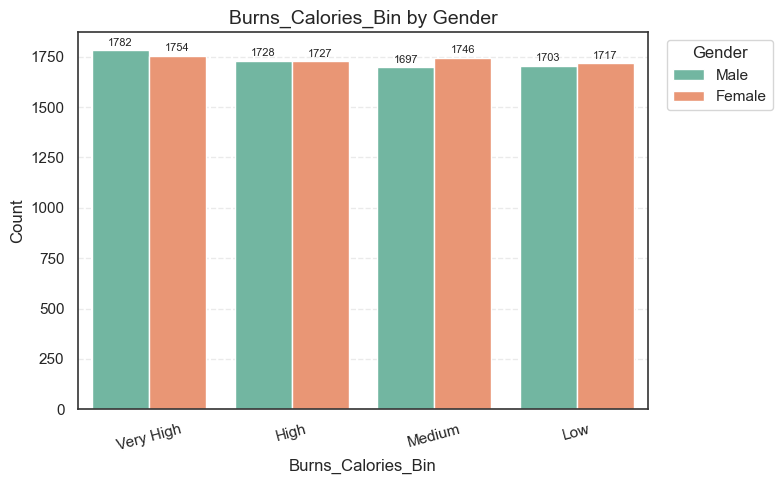

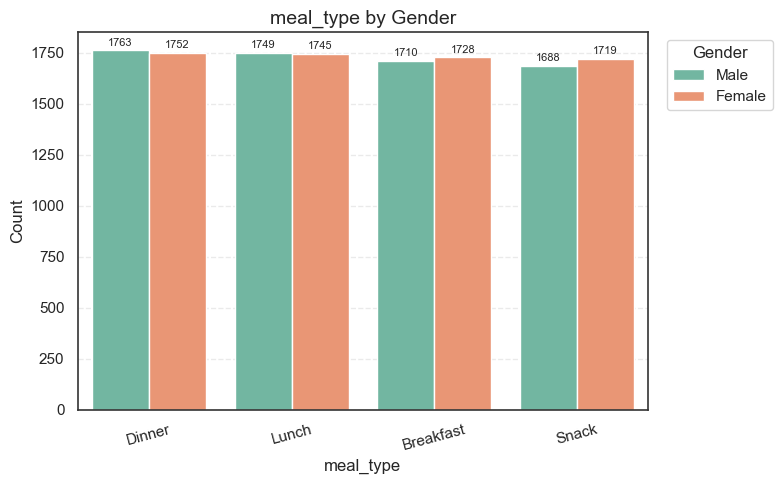

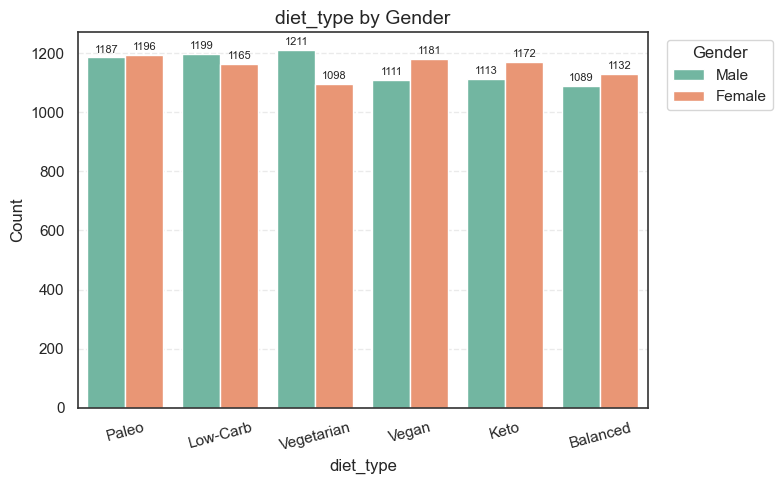

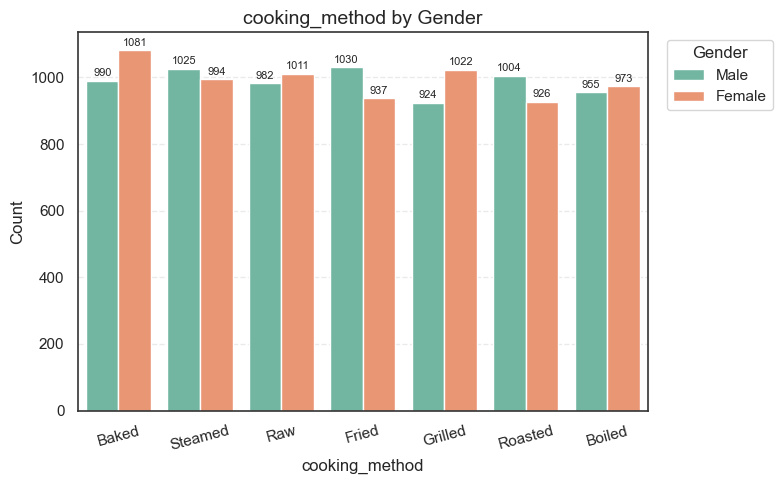

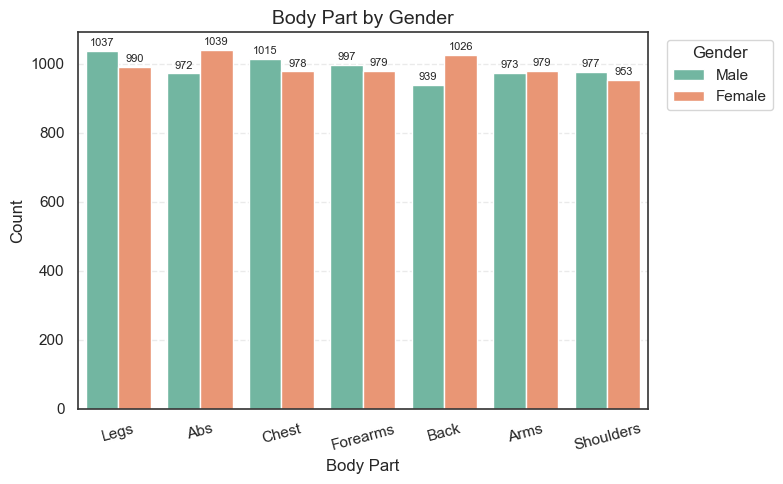

In [165]:
cols_by_gender = ["Workout_Type", "Difficulty Level", "Burns_Calories_Bin", "meal_type", "diet_type", "cooking_method", "Body Part"]

for col in cols_by_gender:
    plt.figure(figsize=(8, 5))
    
    ax = sns.countplot(
        data=df,
        x=col,
        hue="Gender",
        order=df[col].value_counts().index
    )
    
    # Add count labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
    plt.title(f"{col} by Gender")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)
    plt.legend(title="Gender", loc="upper left", bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()


Distributions of numerical columns

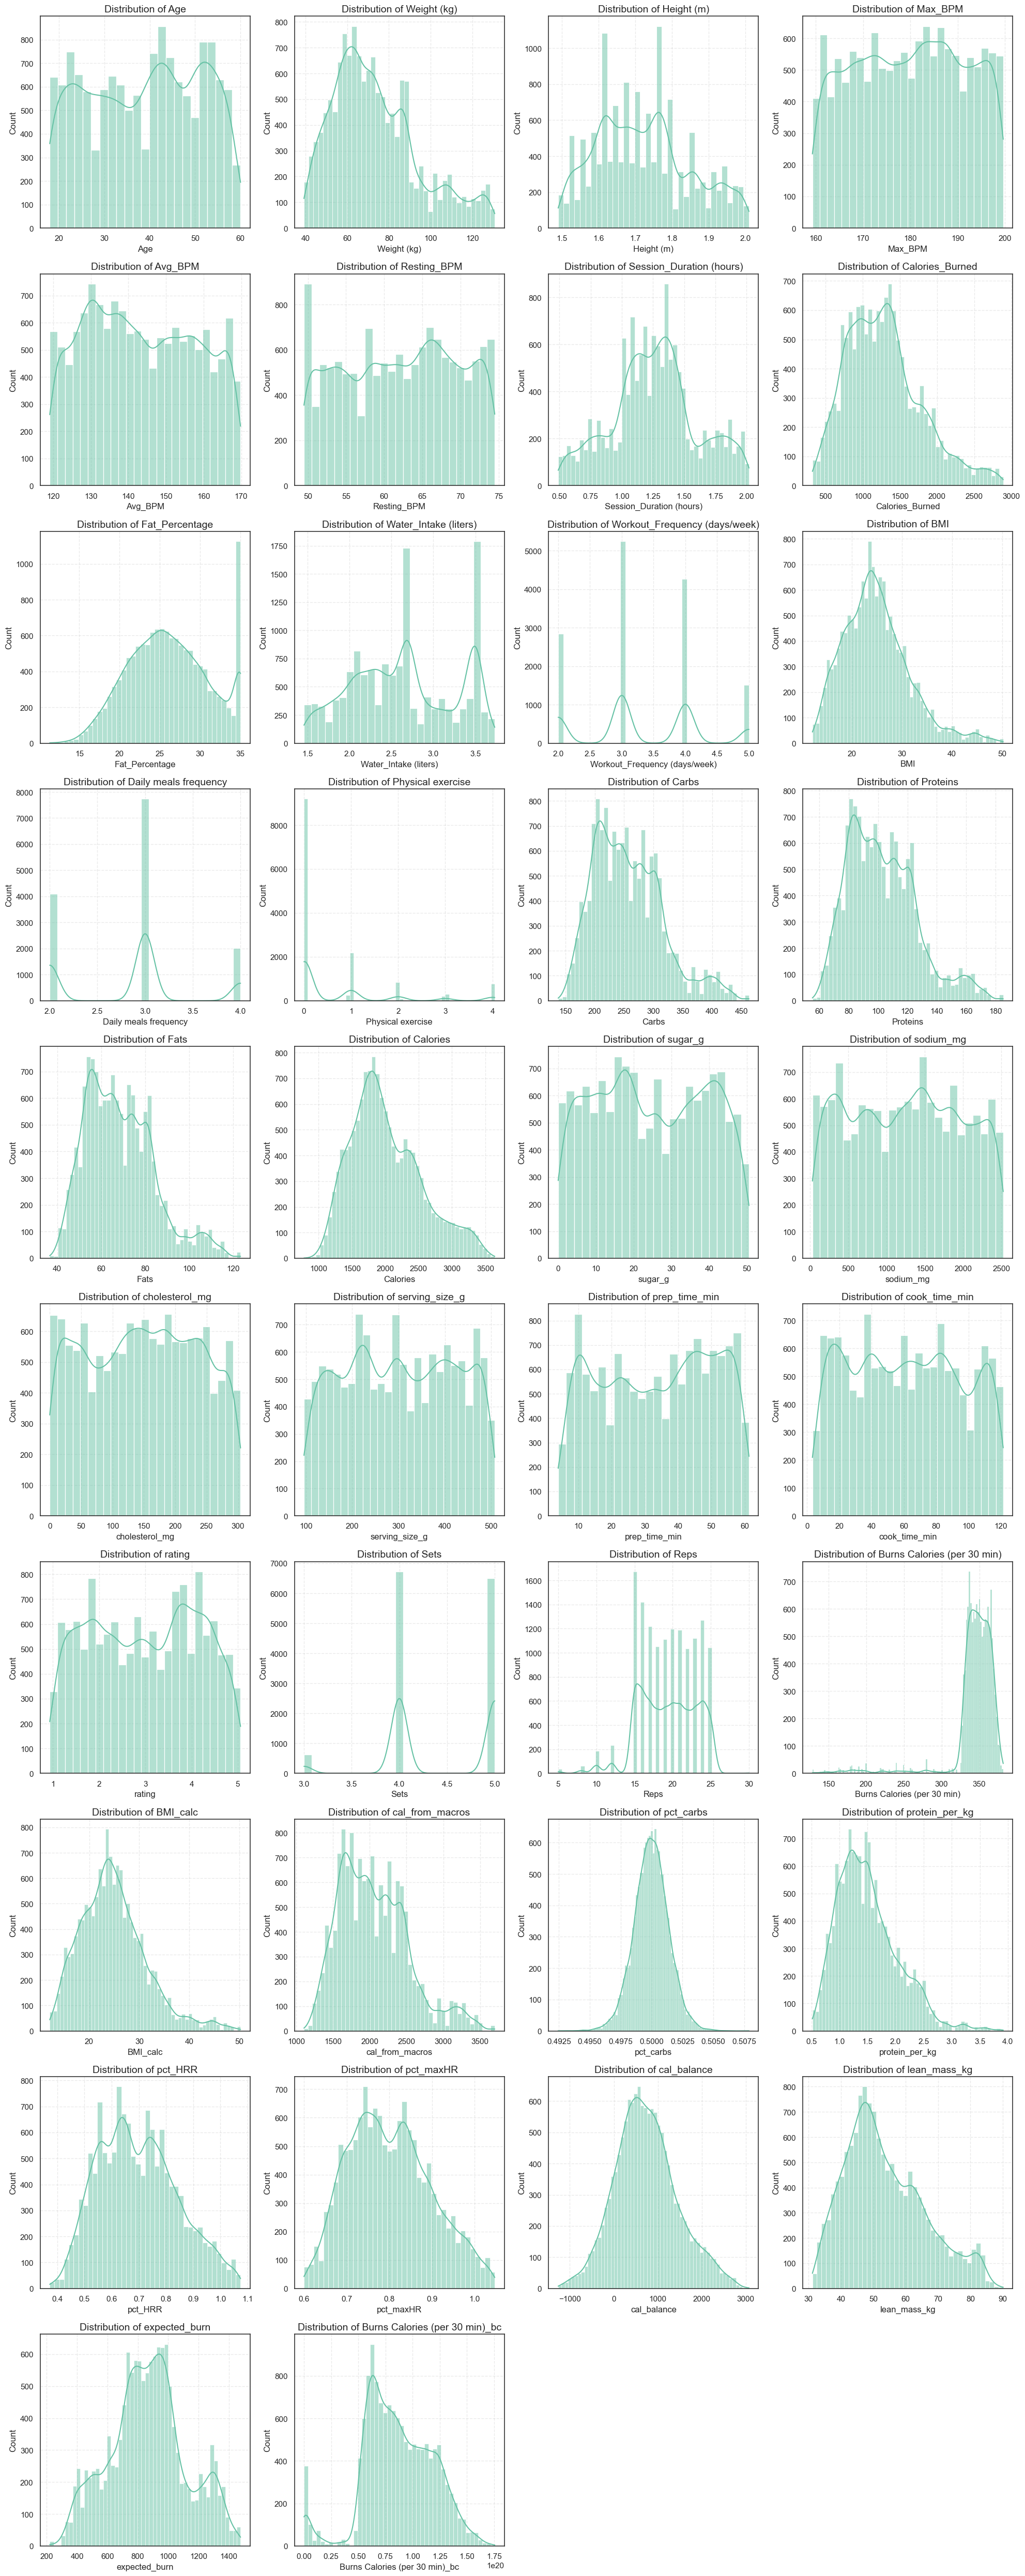

In [166]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(num_cols, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df[col], kde=True) 
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

Most popular values for categorical attributes with a lot of possible values

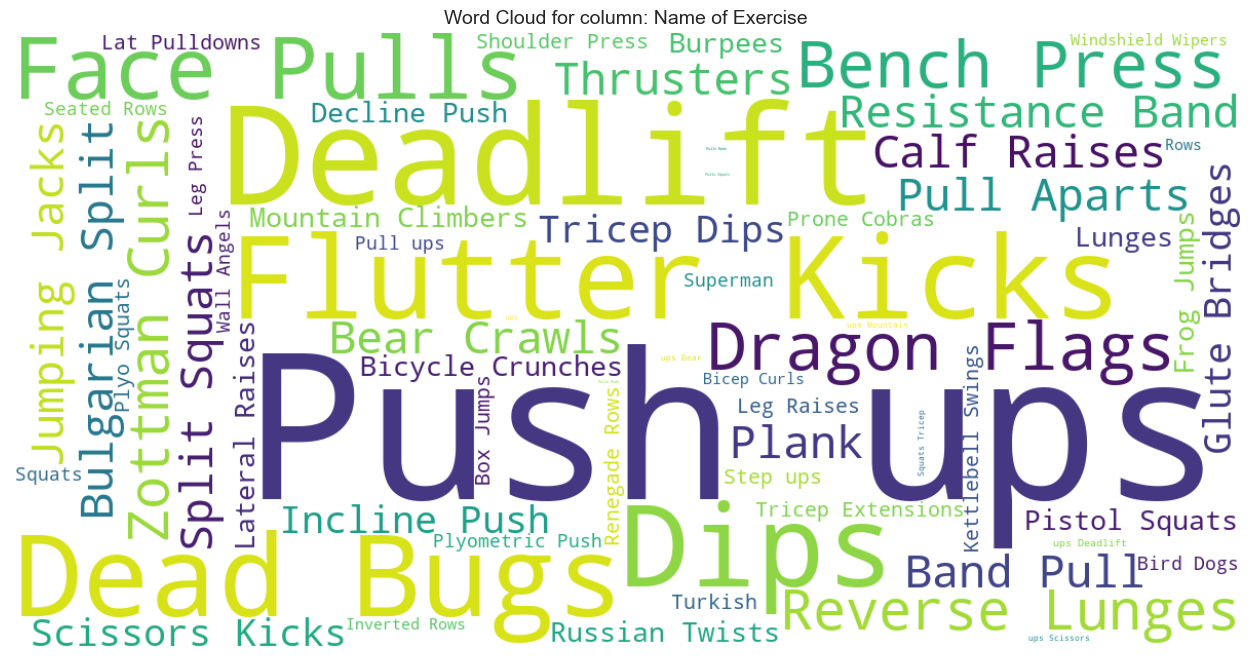

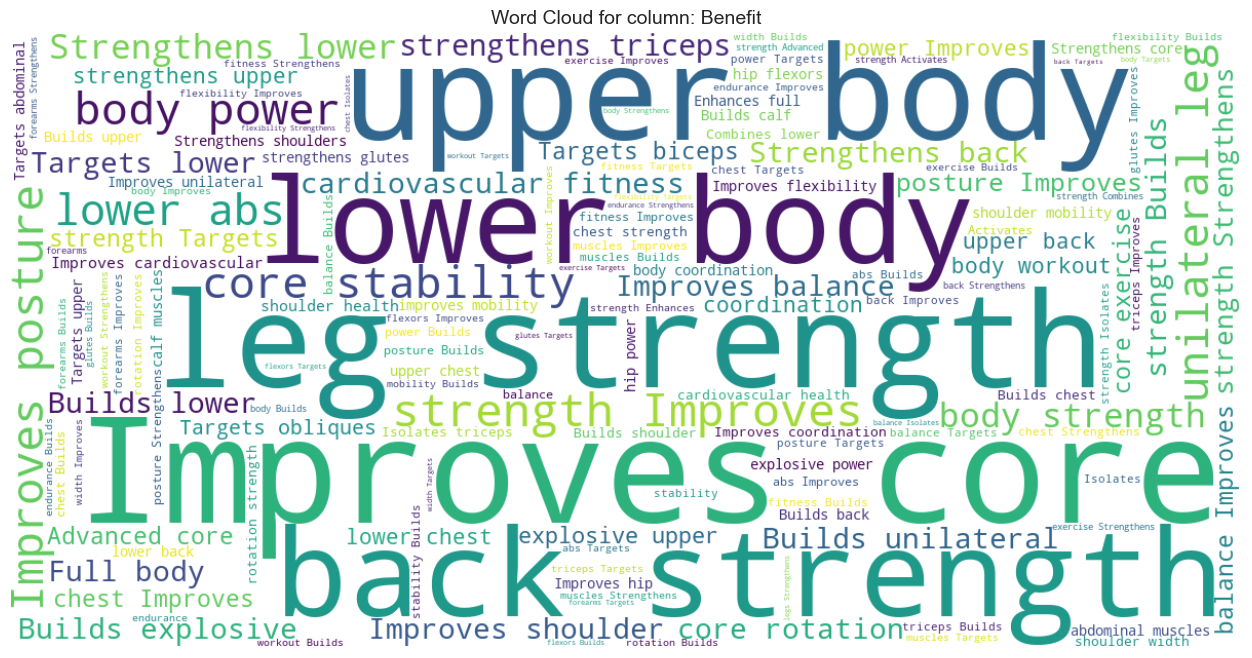

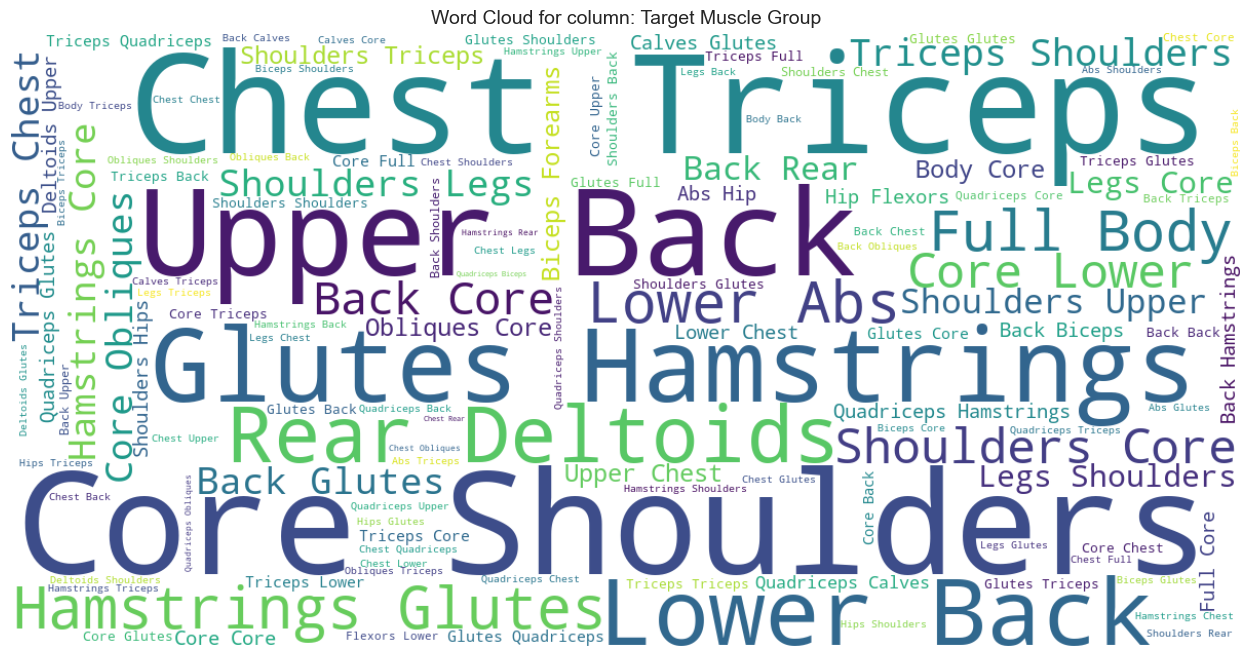

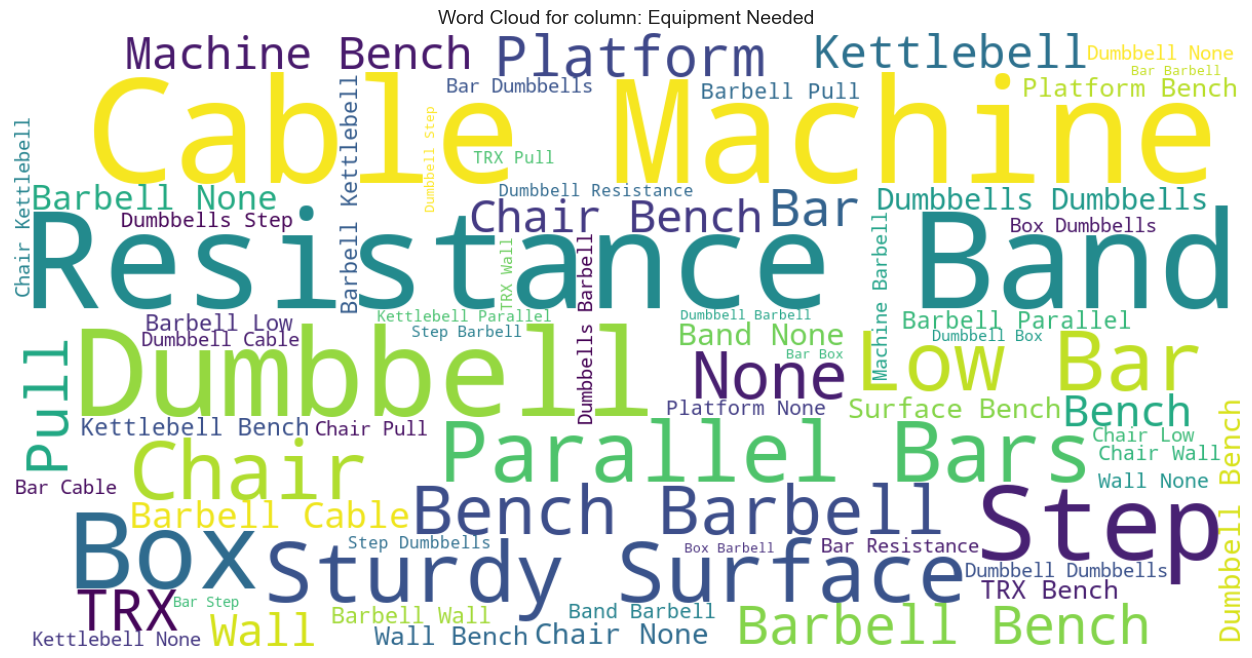

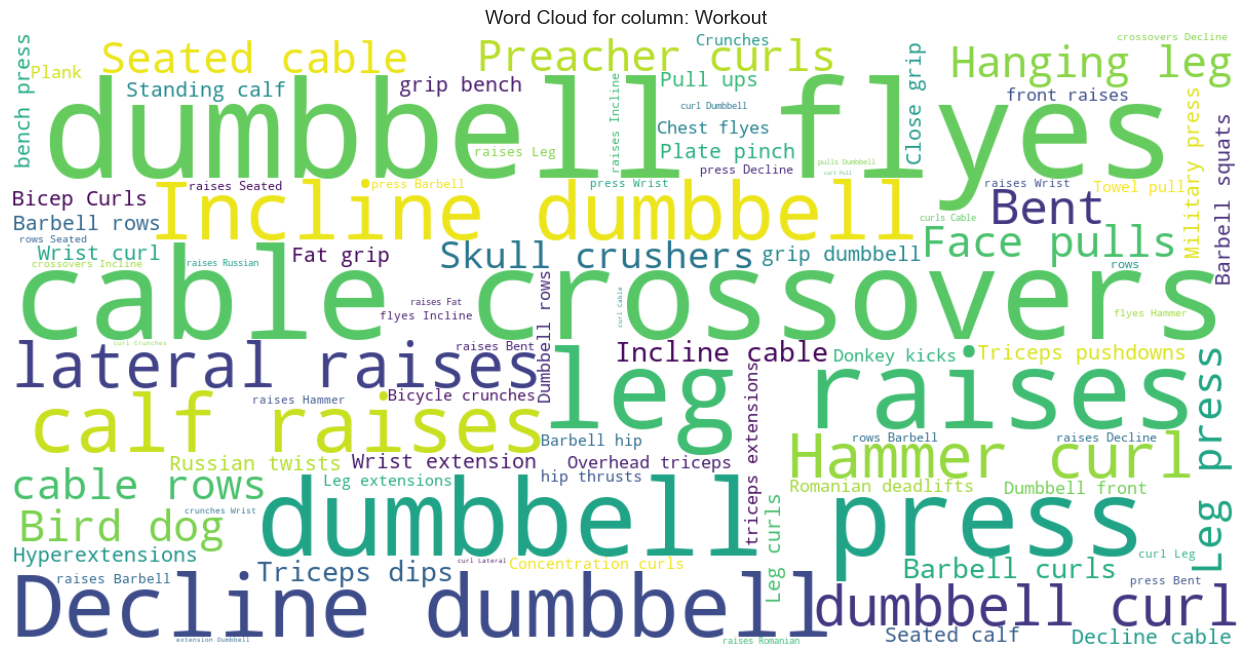

In [167]:
columns = ['Name of Exercise', 'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Workout']

for column in columns:
    text = " ".join(df[column].astype(str).dropna().tolist())
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for column: {column}")
    plt.show()

These attributes are calculated from others. That's why we are going to recalculate them to make sure they contain valid values.

In [168]:
calc_columns = ['BMI', 'Burns Calories (per 30 min)', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 
            'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc']
df['BMI_new'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)

df['Burn_Cal_per30min'] = (df['Calories_Burned'] / (df['Session_Duration (hours)'] * 60)) * 30

df["Cal_from_macroelemets"] = (df["Proteins"] * 4 + df["Carbs"] * 4 + df["Fats"] * 9)

# percent of carbs
df['Carbs_percent'] = (df['Carbs'] * 4) / df['Cal_from_macroelemets'] * 100

df['Protein_p_kg'] = df['Proteins'] / df['Weight (kg)']

# HRR = HRmax − HRrest (Heart Rate Reserv)
df['HRR'] = (df['Avg_BPM'] - df['Resting_BPM']) / (df['Max_BPM'] - df['Resting_BPM']) * 100

df['maxHR_percent'] = df['Avg_BPM'] / df['Max_BPM'] * 100

df['Cal_blnc'] = df['Calories'] - df['Calories_Burned']

# lean_mass_kg (сухая масса тела)
df['Lean_kg'] = df['Weight (kg)'] * (1 - df['Fat_Percentage'] / 100)

# MET * weight * 0.0175 * time
df['exptd_burn'] = (0.1 * df['Avg_BPM'] + 1.0) * df['Weight (kg)'] * 0.0175 * df['Session_Duration (hours)'] * 60

And now we are going to check in recalculated values are equal to initial one.

In [170]:
pairs = {
    'BMI': 'BMI_new',
    'BMI_calc': 'BMI_new',
    'Burns Calories (per 30 min)': 'Burn_Cal_per30min',
    'Burns Calories (per 30 min)_bc': 'Burn_Cal_per30min',
    'cal_from_macros': 'Cal_from_macroelemets',
    'pct_carbs': 'Carbs_percent',
    'protein_per_kg': 'Protein_p_kg',
    'pct_HRR': 'HRR',
    'pct_maxHR': 'maxHR_percent',
    'cal_balance': 'Cal_blnc',
    'lean_mass_kg': 'Lean_kg',
    'expected_burn': 'expected_burn'
}

results = {}
df1 = df.copy()

for old_col, new_col in pairs.items():
    diff_col = f"{old_col}_diff"
    match_col = f"{old_col}_matches"

    df1[diff_col] = df1[new_col] - df[old_col]
    df1[match_col] = np.isclose(df1[new_col], df1[old_col], atol=1e-5)

    results[old_col] = df1[match_col].all()

# In what columns we have the same value for calculated and initial
comparison_summary = pd.DataFrame({
    'Attribute': results.keys(),
    'Matches': results.values()
})

print(comparison_summary)

                         Attribute  Matches
0                              BMI    False
1                         BMI_calc     True
2      Burns Calories (per 30 min)    False
3   Burns Calories (per 30 min)_bc    False
4                  cal_from_macros     True
5                        pct_carbs    False
6                   protein_per_kg     True
7                          pct_HRR    False
8                        pct_maxHR    False
9                      cal_balance     True
10                    lean_mass_kg     True
11                   expected_burn     True


In [171]:
df = df.drop(columns=calc_columns)

In [172]:
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
            'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI_new', 
            'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg', 
            'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets', 'Reps', 
            'Burn_Cal_per30min', 'Cal_from_macroelemets', 'Carbs_percent', 'Protein_p_kg', 'HRR', 'maxHR_percent', 
            'Cal_blnc', 'Lean_kg', 'exptd_burn']

cat_cols = ['Gender', 'Workout_Type', 'Experience_Level', 'meal_type', 'diet_type', 'cooking_method', 'Name of Exercise', 
            'Benefit', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout',
            'Burns_Calories_Bin']

Outliers Analysis

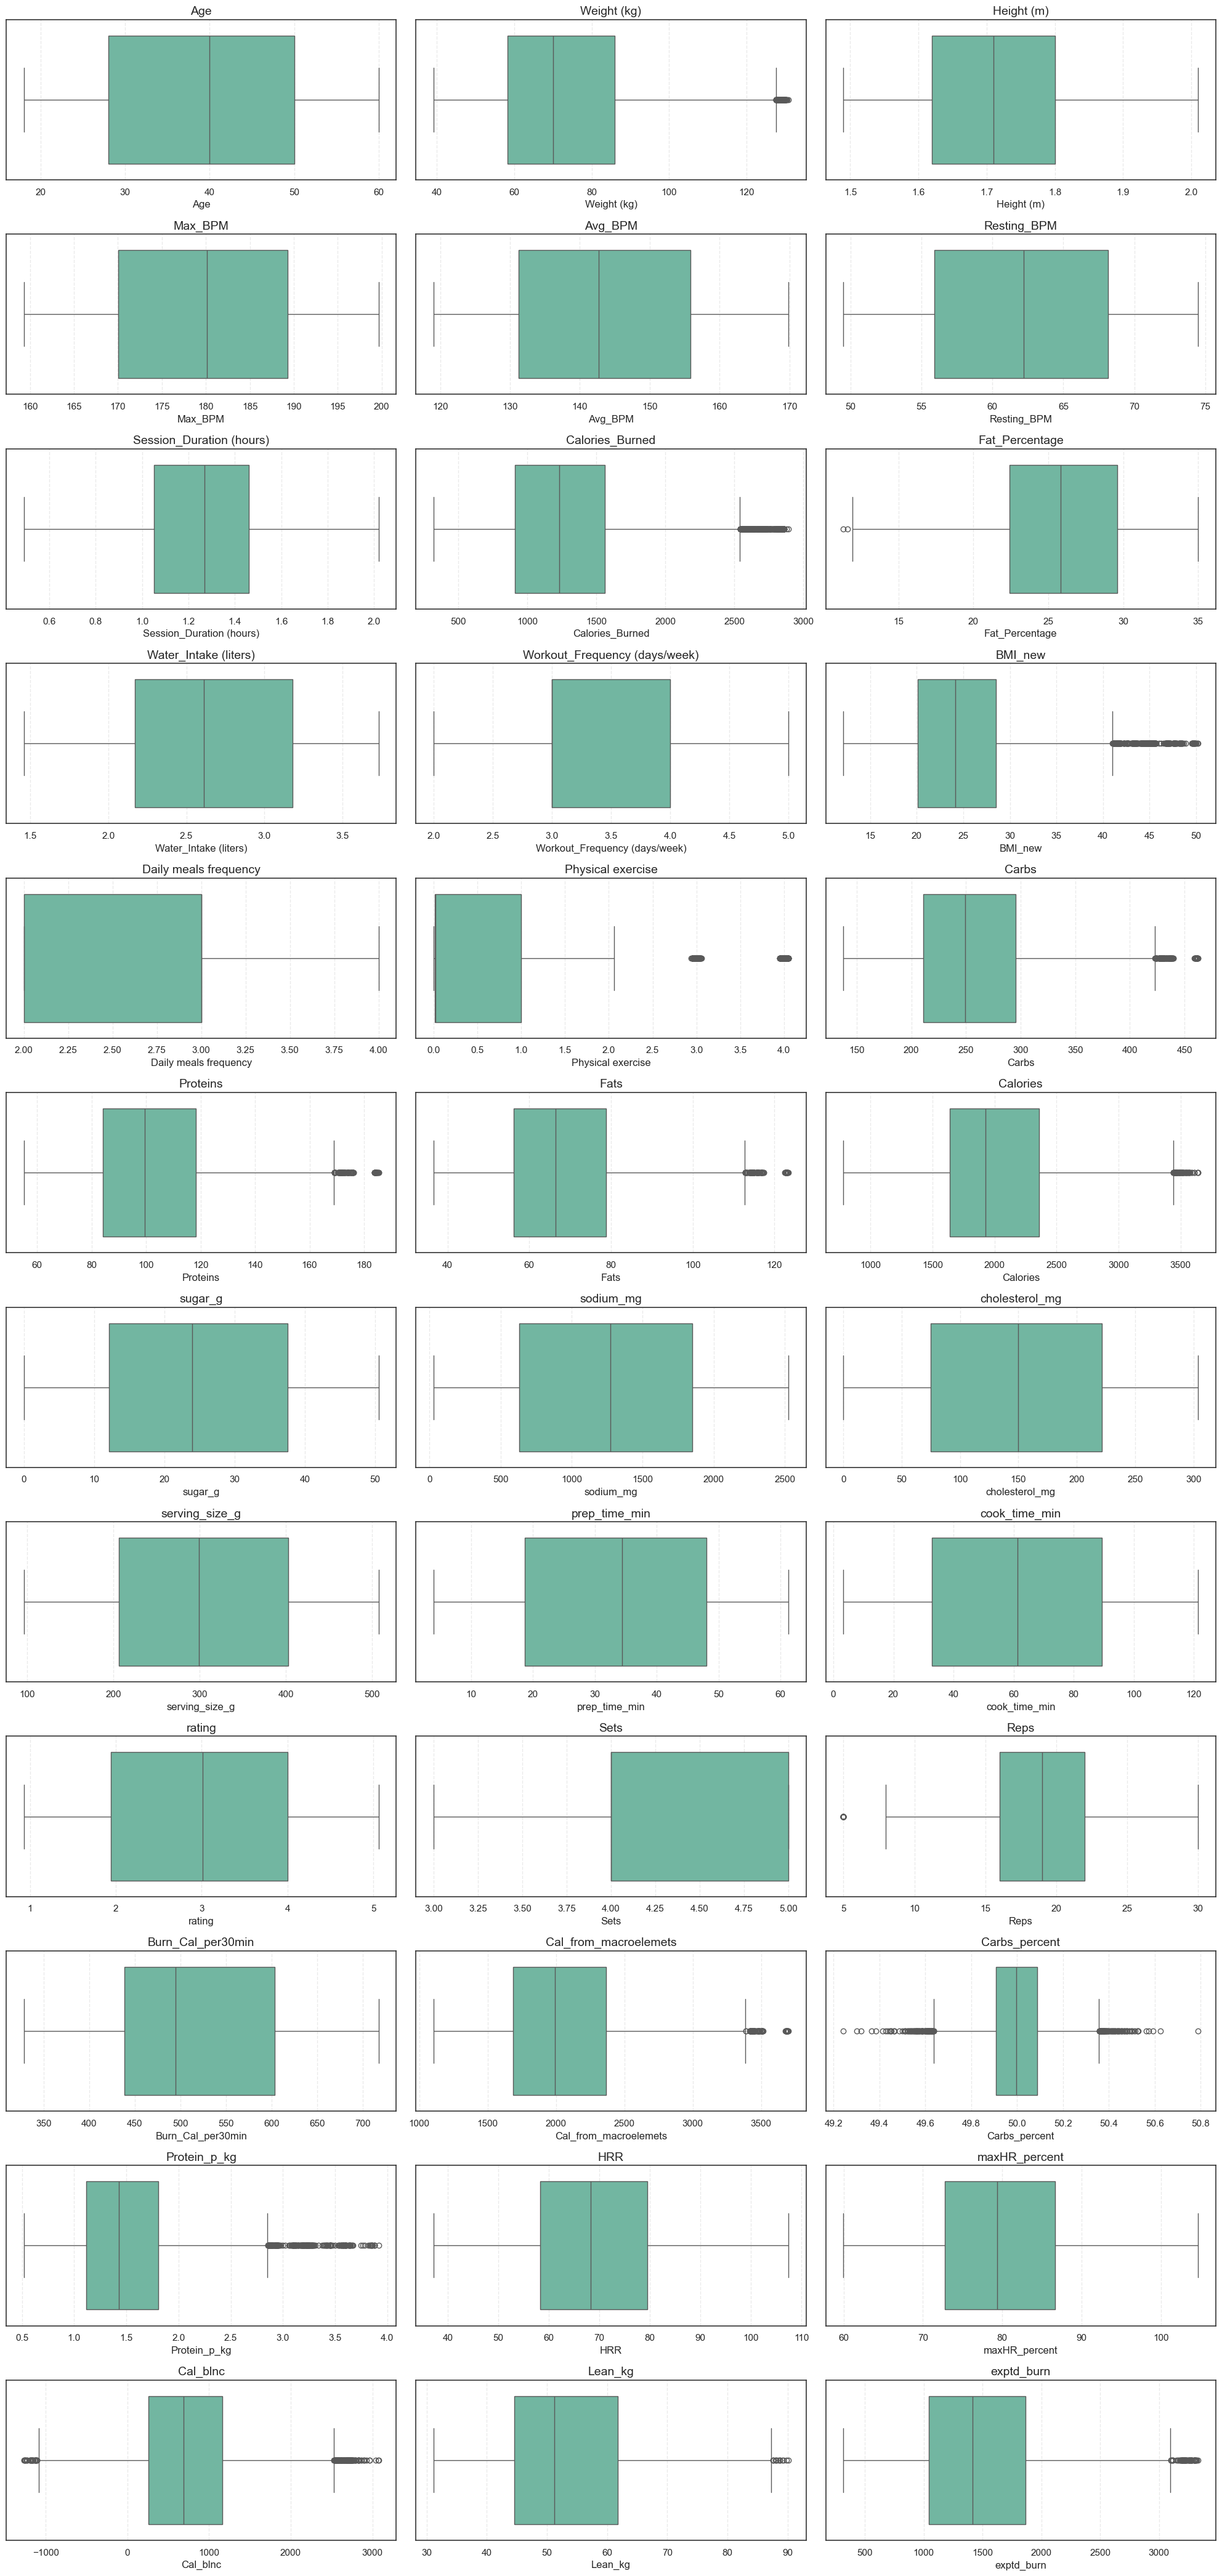

In [132]:
plt.figure(figsize=(20, 45))
for i, col in enumerate(num_cols, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

Weight (kg) - We should not remove outliers in weight because these extreme values represent real clients, and removing them could make the model ignore people with very high weight. Weight is critical for calculating calories, BMI, and personalized recommendations.

Сalories_burned and Calories - Big outliers can dominate model training if we don’t handle them. Standardization (z-scaling) puts all values on the same scale. Outliers stay in the data, but their influence is balanced, so the model doesn’t overfit to extreme cases. This way, the model can learn properly from all clients, including those with very high values. (So we are going to use scaling for model preprocessing)

BMI_new - We should keep BMI outliers because they represent real people with very low or very high BMI. Removing them would make the model ignore these clients. Standardization or scaling can handle extreme values without losing important information.

We chose Winsorization for Carbs, Proteins, and Fats because these attributes can have extreme values that are real but rare, like very large portion sizes. Removing them would lose important information, while leaving them as-is could make the model too sensitive to outliers. Winsorization reduces the influence of these extreme values by capping them at a chosen percentile, keeping most of the data intact. This way, the model can learn patterns from typical values without being dominated by rare extremes.

In [133]:
from scipy.stats.mstats import winsorize

df['Carbs_winsor'] = winsorize(df['Carbs'], limits=[0.05, 0.05])
df['Proteins_winsor'] = winsorize(df['Proteins'], limits=[0.05, 0.05])
df['Fats_winsor'] = winsorize(df['Fats'], limits=[0.05, 0.05])

print(df[['Carbs', 'Carbs_winsor', 'Proteins', 'Proteins_winsor', 'Fats', 'Fats_winsor']].head())

    Carbs  Carbs_winsor  Proteins  Proteins_winsor   Fats  Fats_winsor
0  267.68        267.68    106.05           106.05  71.63        71.63
1  214.32        214.32     85.41            85.41  56.97        56.97
3  203.22        203.22     80.84            80.84  54.56        54.56
4  332.79        332.79    133.05           133.05  88.43        88.43
7  262.57        262.57    105.41           105.41  70.37        70.37


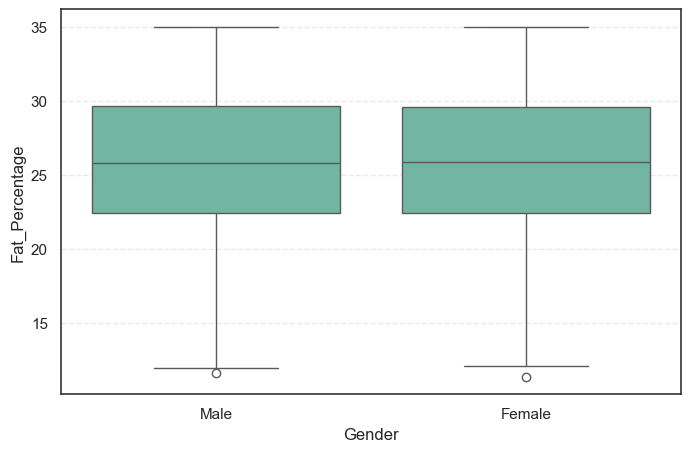

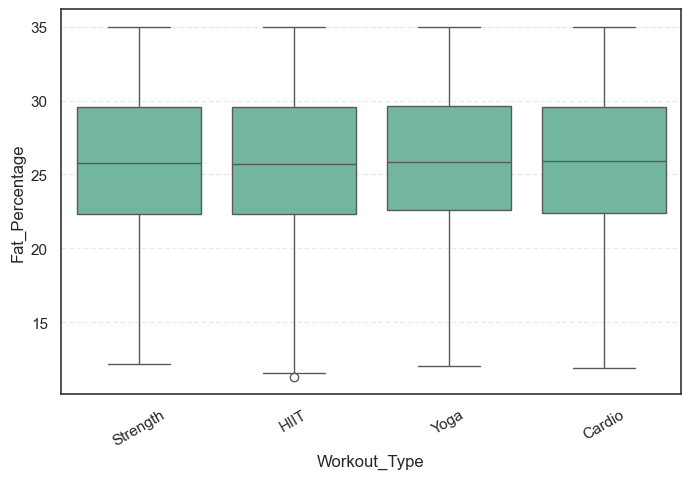

In [173]:
sns.boxplot(data=df, x='Gender', y='Fat_Percentage')
plt.show()

sns.boxplot(data=df, x='Workout_Type', y='Fat_Percentage')
plt.xticks(rotation=30)
plt.show()


In [174]:
df['Fat_Percentage'].min(), df['Fat_Percentage'].max()


(11.333133614105773, 35.0)

In [175]:
df['Fat_Percentage'].value_counts().sort_index().tail(5)

Fat_Percentage
34.984789      1
34.986684      1
34.989943      1
34.998845      1
35.000000    967
Name: count, dtype: int64